In [1]:
import pandas as pd

# 读取数据
df = pd.read_csv("cleaned_tweets.csv")
df.head()

,url,twitterUrl,id,text,retweetCount,replyCount,likeCount,quoteCount,createdAt,bookmarkCount,isRetweet,isQuote,location,full_text_lower,stopword,full_text_clean,punct_token,lemma
0,https://x.com/heyreb2020/status/18550272497091...,https://twitter.com/heyreb2020/status/18550272...,1855027249709191424,President @realDonaldTrump should do exactly w...,0,0,1,0,Fri Nov 08 23:18:55 +0000 2024,0,False,False,"Whitney, NV",president @realdonaldtrump should do exactly w...,president @realdonaldtrump exactly @thedemocra...,"['president', 'realdonaldtrump', 'exactly', 't...","['president', 'realdonaldtrump', 'exactly', 't...",president realdonaldtrump exactly thedemocrats...
1,https://x.com/BookofJahJah/status/185502312813...,https://twitter.com/BookofJahJah/status/185502...,1855023128130523392,One last grasp to insert Kamala somewhere huh ...,0,0,0,0,Fri Nov 08 23:02:33 +0000 2024,0,False,True,Where The Air Gets Cold,one last grasp to insert kamala somewhere huh ...,one last grasp insert kamala somewhere huh 😏 #...,"['one', 'last', 'grasp', 'insert', 'kamala', '...","['one', 'last', 'grasp', 'insert', 'kamala', '...",one last grasp insert kamala somewhere huh bla...
2,https://x.com/patricia_kooy/status/18550171952...,https://twitter.com/patricia_kooy/status/18550...,1855017195299831808,"I'm in favor of ALL the Lefty, Liberal, Female...",1,0,2,0,Fri Nov 08 22:38:58 +0000 2024,0,False,True,"Michigan, USA","i'm in favor of all the lefty, liberal, female...","i'm favor lefty, liberal, female feminists sha...","['i', 'm', 'favor', 'lefty', 'liberal', 'femal...","['i', 'm', 'favor', 'lefty', 'liberal', 'femal...",i m favor lefty liberal female feminist shave ...
3,https://x.com/arveela/status/1855015202426621976,https://twitter.com/arveela/status/18550152024...,1855015202426621952,@kristenmag Maybe from #Walz's daughter or who...,0,0,0,0,Fri Nov 08 22:31:03 +0000 2024,0,False,False,"Florida, USA",@kristenmag maybe from #walz's daughter or who...,@kristenmag maybe #walz's daughter whoever tho...,"['kristenmag', 'maybe', 'walz', 's', 'daughter...","['kristenmag', 'maybe', 'walz', 's', 'daughter...",kristenmag maybe walz s daughter whoever thoug...
4,https://x.com/jillbroderick/status/18550130148...,https://twitter.com/jillbroderick/status/18550...,1855013014841262336,"Wordle 1,238 5/6\n\n⬛⬛⬛⬛🟨\n⬛🟨🟨⬛⬛\n⬛🟨⬛🟨🟨\n🟨🟩🟩🟨🟩...",0,0,0,0,Fri Nov 08 22:22:21 +0000 2024,0,False,False,NaN,"wordle 1,238 5/6\n\n⬛⬛⬛⬛🟨\n⬛🟨🟨⬛⬛\n⬛🟨⬛🟨🟨\n🟨🟩🟩🟨🟩...","wordle 1,238 5/6 ⬛⬛⬛⬛🟨 ⬛🟨🟨⬛⬛ ⬛🟨⬛🟨🟨 🟨🟩🟩🟨🟩 🟩🟩🟩🟩🟩...","['wordle', 'not', 'raids', 'started']","['wordle', 'not', 'raids', 'started']",wordle not raid start


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87358 entries, 0 to 87357
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              87358 non-null  object
 1   twitterUrl       87358 non-null  object
 2   id               87358 non-null  int64 
 3   text             87358 non-null  object
 4   retweetCount     87358 non-null  int64 
 5   replyCount       87358 non-null  int64 
 6   likeCount        87358 non-null  int64 
 7   quoteCount       87358 non-null  int64 
 8   createdAt        87358 non-null  object
 9   bookmarkCount    87358 non-null  int64 
 10  isRetweet        87358 non-null  bool  
 11  isQuote          87358 non-null  bool  
 12  location         60082 non-null  object
 13  full_text_lower  87358 non-null  object
 14  stopword         87358 non-null  object
 15  full_text_clean  87358 non-null  object
 16  punct_token      87358 non-null  object
 17  lemma            87310 non-null

In [3]:
df = df.dropna(subset=['lemma'])

In [4]:
from nltk.corpus import stopwords

stop=stopwords.words('english')
# 增加停用词
additional_stop = ['rt','amp','http','https']

stop.extend(additional_stop)

df['lemma']=df['lemma'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

df['lemma']

0        president realdonaldtrump exactly thedemocrats...
1        one last grasp insert kamala somewhere huh bla...
2        favor lefty liberal female feminist shave head...
3        kristenmag maybe walz daughter whoever thought...
4                                        wordle raid start
                               ...                        
87353    dont understand wtf bydone talk im muslim im i...
87354                             donaldjtrumpjr hilarious
87355    wooo already tell dominate dominate convo onli...
87356                 national guard send dem crazy wypipo
87357                     trump avoid question try lie smh
Name: lemma, Length: 87310, dtype: object

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 转化为TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # 1000个特征
tfidf_matrix = vectorizer.fit_transform(df['lemma'])

tfidf_matrix.shape

(87310, 1000)

数据量太大，计算时间过长，采用MiniBatchKMeans加速

In [4]:
# 子采样
# sample_fraction = 0.2
# sampled_lemmas = lemmas.sample(frac=sample_fraction, random_state=42)

# tfidf_matrix_sampled = vectorizer.fit_transform(sampled_lemmas)

In [6]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# 使用肘部法则来选择 K 值
inertia = []
K_range = range(1, 20)
for k in K_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

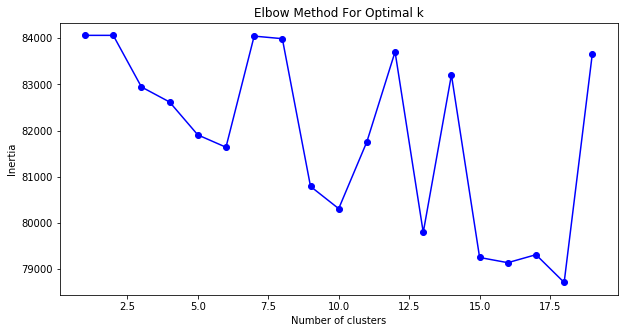

In [7]:
# 绘制肘部法则图
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [8]:
# 根据肘部法则图选择 K 值
K = 6
# 应用 Mini-batch K-means 聚类
kmeans = MiniBatchKMeans(n_clusters=K, random_state=42, batch_size=1000)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

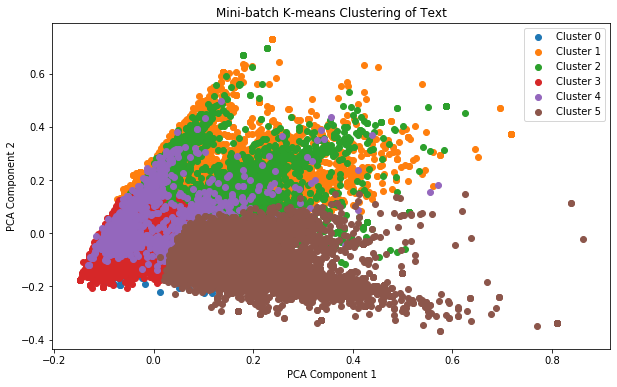

In [9]:
# 主题识别 使用 PCA 降维以便可视化
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(tfidf_matrix.toarray())
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# 可视化聚类结果
plt.figure(figsize=(10, 6))
for cluster in range(K):
    plt.scatter(df[df['cluster'] == cluster]['pca1'], df[df['cluster'] == cluster]['pca2'], label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Mini-batch K-means Clustering of Text')
plt.legend()
plt.show()

In [11]:
# 打印每个聚类的主题
for cluster in range(K):
    print(f"Cluster {cluster}:")
    cluster_texts = df[df['cluster'] == cluster]['lemma']
    for text in cluster_texts[:5]:  # 打印每个聚类的前5个文本
        print(f"  - {text}")
    print("\n")

Cluster 0:
  - shout realdonaldtrump elonmusk joerogan guy make best timeline live time alive besttimeline maga
  - donaldtnews trump maga let make america great listen song spotify apple amazon deezer pandora tube etc watch music video apple vevo tidal tube etc
  - trump maga let make america great listen song spotify apple amazon deezer pandora tube etc watch music video apple vevo tidal tube etc co
  - afraid project agenda go hard make america great maga
  - make america great presidentialelection americadecides roadtothewhitehouse usapolitics yourvotematters futureofamerica co


Cluster 1:
  - atmu estimate eps slight dip last year could one watch also bolt cn pcrcf might reach orbit sooner expect lyft wbd vale f nicetwomeatuxlingorm biden bluewave
  - important netanyahu biden harris dismantle int law facilitate israel gazagenocide knowing expose country threat name trump palestiniangenocide co qplwixruga co fascism gaza
  - cooked meme election viral explore trumpassassination t

In [29]:
# 分析每个聚类
from collections import Counter

def get_top_keywords(cluster_texts, vectorizer, k=10):
    word_count = Counter(" ".join(cluster_texts).split())
    return [word for word, _ in word_count.most_common(k)]

cluster_keywords = {}
for cluster_id in range(6):
    cluster_texts = df[df['cluster'] == cluster_id]['lemma']
    top_keywords = get_top_keywords(cluster_texts, vectorizer)
    cluster_keywords[cluster_id] = top_keywords
    print(f"Cluster {cluster_id} Top Keywords: {top_keywords}")

Cluster 0 Top Keywords: ['america', 'co', 'great', 'follow', 'maga', 'make', 'trump', 'thank', 'back', 'realdonaldtrump']
Cluster 1 Top Keywords: ['biden', 'co', 'trump', 'joe', 'president', 'democrat', 'joebiden', 'uselections', 'harris', 'say']
Cluster 2 Top Keywords: ['debate', 'co', 'trump', 'biden', 'presidential', 'presidentialdebate', 'debatenight', 'harris', 'watch', 'cnn']
Cluster 3 Top Keywords: ['co', 'vote', 'trump', 'kamalaharris', 'get', 'election', 'us', 'go', 'people', 'uselections']
Cluster 4 Top Keywords: ['look', 'like', 'co', 'trump', 'biden', 'make', 'debate', 'get', 'president', 'go']
Cluster 5 Top Keywords: ['trump', 'co', 'donald', 'president', 'kamala', 'harris', 'donaldtrump', 'kamalaharris', 'election', 'win']


In [30]:
# 去除干扰词
remove_words = ['co','us']

df['removed']=df['lemma'].apply(lambda x: ' '.join([word for word in x.split() if word not in remove_words]))
cluster_keywords = {}
for cluster_id in range(6):
    cluster_texts = df[df['cluster'] == cluster_id]['removed']
    top_keywords = get_top_keywords(cluster_texts, vectorizer)
    cluster_keywords[cluster_id] = top_keywords
    print(f"Cluster {cluster_id} Top Keywords: {top_keywords}")

Cluster 0 Top Keywords: ['america', 'great', 'follow', 'maga', 'make', 'trump', 'thank', 'back', 'realdonaldtrump', 'fight']
Cluster 1 Top Keywords: ['biden', 'trump', 'joe', 'president', 'democrat', 'joebiden', 'uselections', 'harris', 'say', 'kamala']
Cluster 2 Top Keywords: ['debate', 'trump', 'biden', 'presidential', 'presidentialdebate', 'debatenight', 'harris', 'watch', 'cnn', 'kamala']
Cluster 3 Top Keywords: ['vote', 'trump', 'kamalaharris', 'get', 'election', 'go', 'people', 'uselections', 'say', 'president']
Cluster 4 Top Keywords: ['look', 'like', 'trump', 'biden', 'make', 'debate', 'get', 'president', 'go', 'say']
Cluster 5 Top Keywords: ['trump', 'donald', 'president', 'kamala', 'harris', 'donaldtrump', 'kamalaharris', 'election', 'win', 'uselections']


Cluster 0: Pro-Trump Sentiment

Cluster 1: Biden and Presidential Election

Cluster 2: Presidential Debates

Cluster 3: Voting and Election Engagement

Cluster 4: General Political Discussion

Cluster 5: Election Outcome and Trump

In [31]:
# 为每个聚类命名
cluster_names = {
    0: "Pro-Trump Sentiment",
    1: "Biden and Presidential Election",
    2: "Presidential Debates",
    3: "Voting and Election Engagement",
    4: "General Political Discussion",
    5: "Election Outcome and Trump"
}

# 将聚类名称添加到 DataFrame
df['cluster_name'] = df['cluster'].map(cluster_names)

In [32]:
# 保存结果
df.to_csv('clustered_tweets.csv', index=False)